**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Maestría Académica en Ciencias de la Computación**

**Curso: Electiva Deep Learning**

**Segundo Semestre 2024**

**Profesor: Dr. Luis-Alexander Calvo-Valverde**

---

**Trabajo Práctico:** 1

**Datos de la entrega:** Jueves 26 de setiembre 2024, a más tardar a las 6:00 pm

**Medio de entrega**: Por medio del TEC-Digital.

**Entregables**: Un archivo jupyter ( .IPYNB ) y todos los archivos adiconales que se requieran para correr su Cuaderno (En un archivo comprimido). En caso de requerir mucho espacio, solicitarle al profesor una carpeta en One-Drive para subir la solución.

---

**Estudiantes:**
- Andrey Arguedas Espinoza - 2020426569


# Trabajo Practico 1 - Andrey Arguedas Espinoza - 2020426569

## 0. Imports


In [25]:
import tensorflow as tf
import random
from tensorflow import keras
import keras_tuner as kt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, BatchNormalization

import seaborn as sns

## 1 - Load Data

### • We load initially the data from the CSV file

In [2]:
#Load data from CSV path
csv_path = 'C:/Users/AndreyArguedas/Desktop/DeepLearning/Documentos de Deep Learning GR 40/TP1/ham10000_metadata_2024-09-01.csv'
df = pd.read_csv(csv_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11720 entries, 0 to 11719
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 11720 non-null  object 
 1   attribution             11720 non-null  object 
 2   copyright_license       11720 non-null  object 
 3   age_approx              11337 non-null  float64
 4   anatom_site_general     9503 non-null   object 
 5   benign_malignant        9042 non-null   object 
 6   concomitant_biopsy      11720 non-null  bool   
 7   diagnosis               11720 non-null  object 
 8   diagnosis_confirm_type  11720 non-null  object 
 9   image_type              11719 non-null  object 
 10  lesion_id               11720 non-null  object 
 11  melanocytic             11720 non-null  bool   
 12  sex                     11377 non-null  object 
dtypes: bool(2), float64(1), object(10)
memory usage: 1.0+ MB


## • Now we build a dataset composed by the images and the corresponding label values (melanocytic = True/False)

### We also apply a resize of 50% on the images dimensions in order to reduce the memory consumption that we will have to do while building, splitting and handling the data

In [3]:
#Build dataset with images + corresponding label

data_path = 'C:/Users/AndreyArguedas/Desktop/DeepLearning/Documentos de Deep Learning GR 40/TP1/ISIC/'
#max_images = 200

def load_data(data_path, values_to_ignore, ignore_ratio):
    images = []
    labels = []
    n = 0
    
    for filename in os.listdir(data_path):

        melanocytic_value = df.loc[df['isic_id'] == filename.replace(".jpg", ""), 'melanocytic'].values[0]

        #if  melanocytic_value not in values_to_ignore or (random.randrange(0, ignore_ratio) != 0 and melanocytic_value in values_to_ignore):
        if  melanocytic_value not in values_to_ignore or melanocytic_value in values_to_ignore:
        
            # Open the image
            img_path = os.path.join(data_path, filename)
            # Resize the image to consume less resources and be able to load more data
            img = Image.open(img_path)
        
            # Calculate the new size
            new_size = (int(img.width * 0.5), int(img.height * 0.5))
    
            # Resize the image
            resized_img = img.resize(new_size, Image.LANCZOS)
        
            # Convert the image to a NumPy array for easier handling
            img_array = np.array(resized_img)

            # Add the new image arrary to list of data
            images.append(img_array)
            #We pair the label data with the image we are loading
            labels.append(df.loc[df['isic_id'] == filename.replace(".jpg", ""), 'melanocytic'].values[0])

            #if melanocytic_value == False:
                #rotated_img = resized_img.rotate(90)
                #img_array = np.array(rotated_img)
                #images.append(img_array)
                #labels.append(False)

    
            n += 1
            if n % 1000 == 0:
                print("Number of images loaded:", n)  
            #if n == max_images:
            #break
    return (np.array(images) , np.array(labels))

images_data_array, labels = load_data(data_path, [True], 4)
# Check the shape of the resulting NumPy array
print(images_data_array.shape)
print(labels.shape)

Number of images loaded: 1000
Number of images loaded: 2000
Number of images loaded: 3000
Number of images loaded: 4000
Number of images loaded: 5000
Number of images loaded: 6000
Number of images loaded: 7000
Number of images loaded: 8000
Number of images loaded: 9000
Number of images loaded: 10000
Number of images loaded: 11000
(11720, 225, 300, 3)
(11720,)


In [4]:
dataset_images_trainX = images_data_array
dataset_images_trainY = labels

print("Size of images dataset: ", dataset_images_trainX.shape)
print("Size of labels: ", dataset_images_trainY.shape)

Size of images dataset:  (11720, 225, 300, 3)
Size of labels:  (11720,)


## 2 - Visualize the first 10 images to see they are loading correctly and with its corresponding Melanocytic value


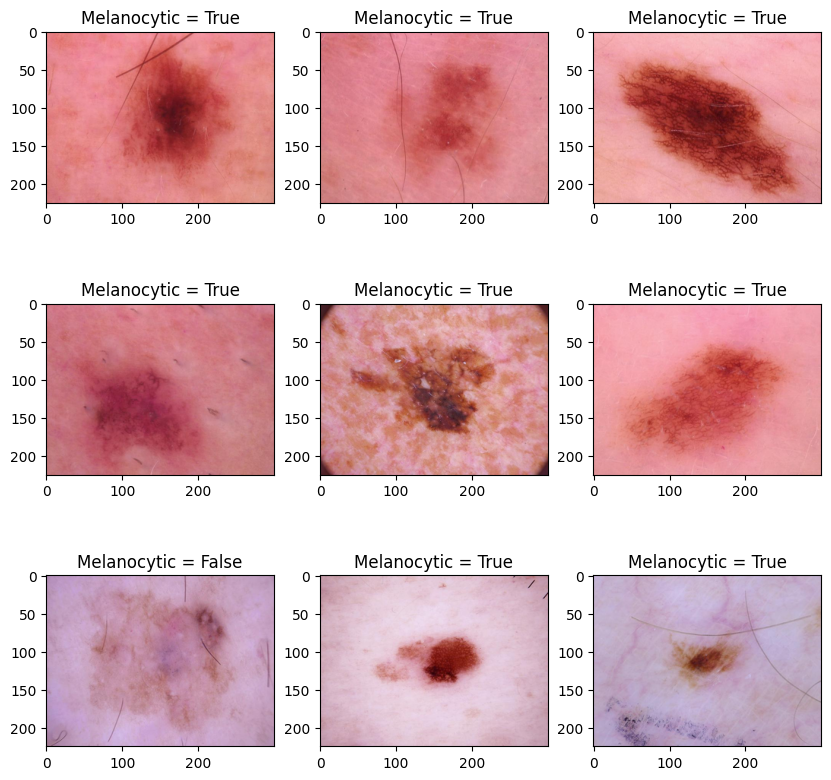

In [5]:
plt.figure(figsize=(10, 10))

for index, digit in zip(range(0, 9), dataset_images_trainX[:10]):
    plt.subplot(3, 3, index + 1)
    plt.imshow(digit)
    if dataset_images_trainY[index] == 1:
      plt.title("Melanocytic = True")
    else:
      plt.title("Melanocytic = False")
plt.show()

## 3 - We validate that we have the same proportion of True-False values from our loaded images


In [6]:
print("**********Melanocytic: values distribution from data loaded from CSV files**************\n")
print(df['melanocytic'].value_counts() , "\n")

print("**********Melanocytic: values distribution from builded dataset **************\n")
print("Count of positives for Melanocytic:" , len(list(filter(lambda i: i == 1, dataset_images_trainY))))
print("Count of false for Melanocytic:" , len(list(filter(lambda i: i == 0, dataset_images_trainY))))

**********Melanocytic: values distribution from data loaded from CSV files**************

melanocytic
True     9042
False    2678
Name: count, dtype: int64 

**********Melanocytic: values distribution from builded dataset **************

Count of positives for Melanocytic: 9042
Count of false for Melanocytic: 2678


## 4 - Data Preparation and splitting the dataset


## We split the data in a proportion of 60% training, 20% validation and 20% test

In [7]:
from sklearn.model_selection import train_test_split

# Step 1: Split into train (60%) and remaining (40%)
X_train, X_remaining, y_train, y_remaining = train_test_split(dataset_images_trainX, dataset_images_trainY, train_size=0.6)


# Step 2: Split remaining data into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5)

print("Dimensions of training data: ", X_train.shape)
print("Dimensions of training labels: ", y_train.shape)

print("Dimensions of validation data: ", X_val.shape)
print("Dimensions of validation labels: ", y_val.shape)

print("Dimensions of test data: ", X_test.shape)
print("Dimensions of test data: ", y_test.shape)


Dimensions of training data:  (7032, 225, 300, 3)
Dimensions of training labels:  (7032,)
Dimensions of validation data:  (2344, 225, 300, 3)
Dimensions of validation labels:  (2344,)
Dimensions of test data:  (2344, 225, 300, 3)
Dimensions of test data:  (2344,)


In [8]:
print("**********Melanocytic: values distribution from builded datasets **************\n")
print("Count of positives for Melanocytic on TRAIN:" , len(list(filter(lambda i: i == True, y_train))))
print("Count of false for Melanocytic on TRAIN:" , len(list(filter(lambda i: i == False, y_train))))

print("**********Melanocytic: values distribution from builded datasets **************\n")
print("Count of positives for Melanocytic on VALIDATION:" , len(list(filter(lambda i: i == True, y_val))))
print("Count of false for Melanocytic on VALIDATION:" , len(list(filter(lambda i: i == False, y_val))))

print("**********Melanocytic: values distribution from builded datasets **************\n")
print("Count of positives for Melanocytic on TEST:" , len(list(filter(lambda i: i == True, y_val))))
print("Count of false for Melanocytic on TEST:" , len(list(filter(lambda i: i == False, y_val))))

**********Melanocytic: values distribution from builded datasets **************

Count of positives for Melanocytic on TRAIN: 5441
Count of false for Melanocytic on TRAIN: 1591
**********Melanocytic: values distribution from builded datasets **************

Count of positives for Melanocytic on VALIDATION: 1777
Count of false for Melanocytic on VALIDATION: 567
**********Melanocytic: values distribution from builded datasets **************

Count of positives for Melanocytic on TEST: 1777
Count of false for Melanocytic on TEST: 567


## **** - Visualize the first 5 images across splits to see them changing


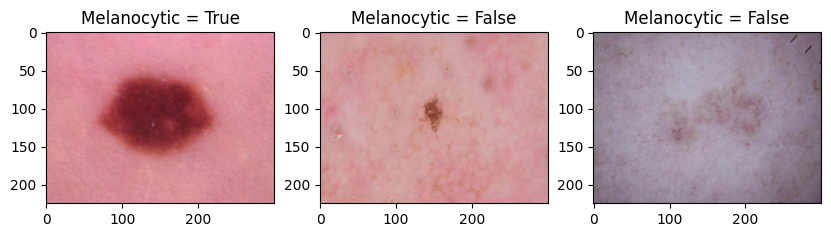

***************


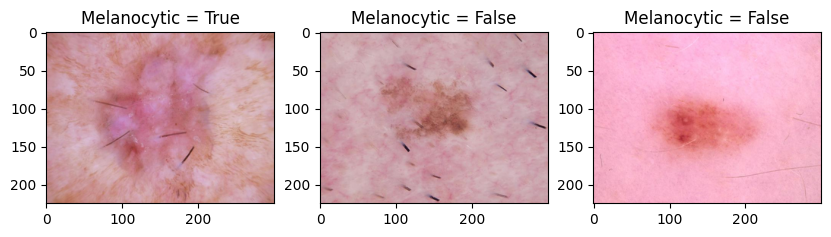

***************


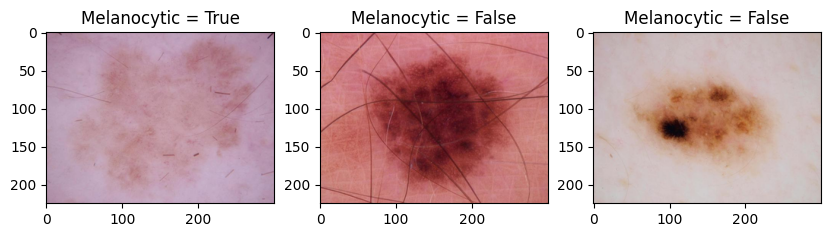

In [9]:
plt.figure(figsize=(10, 10))

for index, digit in zip(range(0, 3), X_train[:10]):
    plt.subplot(3, 3, index + 1)
    plt.imshow(digit)
    if y_train[index] == 1:
      plt.title("Melanocytic = True")
    else:
      plt.title("Melanocytic = False")
plt.show()

print("***************")
plt.figure(figsize=(10, 10))

for index, digit in zip(range(0, 3), X_val[:10]):
    plt.subplot(3, 3, index + 1)
    plt.imshow(digit)
    if y_train[index] == 1:
      plt.title("Melanocytic = True")
    else:
      plt.title("Melanocytic = False")
plt.show()

print("***************")
plt.figure(figsize=(10, 10))

for index, digit in zip(range(0, 3), X_test[:10]):
    plt.subplot(3, 3, index + 1)
    plt.imshow(digit)
    if y_train[index] == 1:
      plt.title("Melanocytic = True")
    else:
      plt.title("Melanocytic = False")
plt.show()

### Now we do data normalization and pixel value transformation across our splitting data 

In [10]:
d1, d2, d3, d4 = X_train.shape

X_train_prep = X_train.reshape((d1, d2*d3*d4))
X_train_prep = X_train_prep.astype('float32') / 255

d1, d2, d3, d4 = X_test.shape

X_test_prep = X_test.reshape((d1, d2*d3*d4))
X_test_prep = X_test_prep.astype('float32') / 255

d1, d2, d3, d4 = X_val.shape

X_val_prep = X_val.reshape((d1, d2*d3*d4))
X_val_prep = X_val_prep.astype('float32') / 255

print("Example of pixel transformation for an image", X_train_prep[0])


Example of pixel transformation for an image [0.8666667  0.53333336 0.62352943 ... 0.8        0.5254902  0.56078434]


## 5-  Define the Neural Network Architecture and build model with Keras Tuner

In [11]:
def model_builder(hp):

    # Definición del modelo
    model = keras.Sequential()
    #model.add(keras.layers.Flatten(input_shape=(300 * 225 * 3, )))

    # Tunning del número de neuronas de la primera hidden layer
    
    model.add(layers.Dense(
        units=hp.Int('units1', min_value=200, max_value=500, step=100),
        activation='relu'
    ))

    model.add(BatchNormalization())

    model.add(layers.Dense(
        units=hp.Int('units2', min_value=50, max_value=100, step=10),
        activation='relu'
    ))

    model.add(BatchNormalization())

    model.add(layers.Dense(
        units=hp.Int('units3', min_value=10, max_value=50, step=5),
        activation='relu'
    ))

    model.add(BatchNormalization())

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    #lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    #initial_learning_rate=1e-2,
    #decay_steps=10000,
    #decay_rate=0.9)


    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-2, max_value=0.1)
        ),
        loss='binary_crossentropy',
        metrics=['accuracy', 'Precision']
    )
    
    return model

## Instantiate Tuner object to do _hypertuning_

In [12]:
# Instantiate the tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=8,
    directory='test_dir',
    project_name='hp_tuning'
)

## Execute the tuner

In [13]:
tuner.search(
    X_train_prep,
    y_train,
    epochs = 8,
    validation_data=(X_val_prep, y_val)
)

Trial 10 Complete [00h 07m 26s]
val_accuracy: 0.8272184133529663

Best val_accuracy So Far: 0.8408703207969666
Total elapsed time: 00h 27m 43s


### Visualize obtained hyperparameters

In [14]:
best_hp = tuner.get_best_hyperparameters()[0]

# Extract the best units and learning rate
best_units1 = best_hp.get('units1')
best_units2 = best_hp.get('units2')
best_units3 = best_hp.get('units3')
best_learning_rate = best_hp.get('learning_rate')

print(f" ******** Best units in first hidden layer: {best_units1}")
print(f" ******** Best units in second hidden layer: {best_units2}")
print(f" ******** Best units in third hidden layer: {best_units3}")
print(f"Best learning rate: {best_learning_rate}")


 ******** Best units in first hidden layer: 200
 ******** Best units in second hidden layer: 80
 ******** Best units in third hidden layer: 35
Best learning rate: 0.04039588485608032


### Summarize the best model obtained

In [15]:
model = tuner.hypermodel.build(best_hp)

model.build(input_shape=(None,300*225*3)) 
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 200)               40500200  
                                                                 
 batch_normalization_3 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 80)                16080     
                                                                 
 batch_normalization_4 (Batc  (None, 80)               320       
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 35)                2835      
                                                                 
 batch_normalization_5 (Batc  (None, 35)              

## 6 - Training phase

In [16]:
#model = tuner.hypermodel.build(best_hp)

history = model.fit(X_train_prep,
                      y_train,
                      epochs=10,
                      validation_data=(X_val_prep, y_val))

Epoch 1/10
220/220 [==============================] - 25s 108ms/step - loss: 0.4543 - accuracy: 0.7823 - precision: 0.8120 - val_loss: 0.6002 - val_accuracy: 0.6984 - val_precision: 0.7992
Epoch 2/10
220/220 [==============================] - 24s 110ms/step - loss: 0.4142 - accuracy: 0.8060 - precision: 0.8350 - val_loss: 1.3595 - val_accuracy: 0.7581 - val_precision: 0.7581
Epoch 3/10
220/220 [==============================] - 23s 106ms/step - loss: 0.4063 - accuracy: 0.8113 - precision: 0.8408 - val_loss: 0.5078 - val_accuracy: 0.7351 - val_precision: 0.8858
Epoch 4/10
220/220 [==============================] - 24s 111ms/step - loss: 0.3992 - accuracy: 0.8093 - precision: 0.8451 - val_loss: 0.4006 - val_accuracy: 0.8089 - val_precision: 0.8301
Epoch 5/10
220/220 [==============================] - 24s 107ms/step - loss: 0.3855 - accuracy: 0.8265 - precision: 0.8600 - val_loss: 0.3945 - val_accuracy: 0.8127 - val_precision: 0.8771
Epoch 6/10
220/220 [==============================] - 2

## 7 - Visualize metrics from the training phase

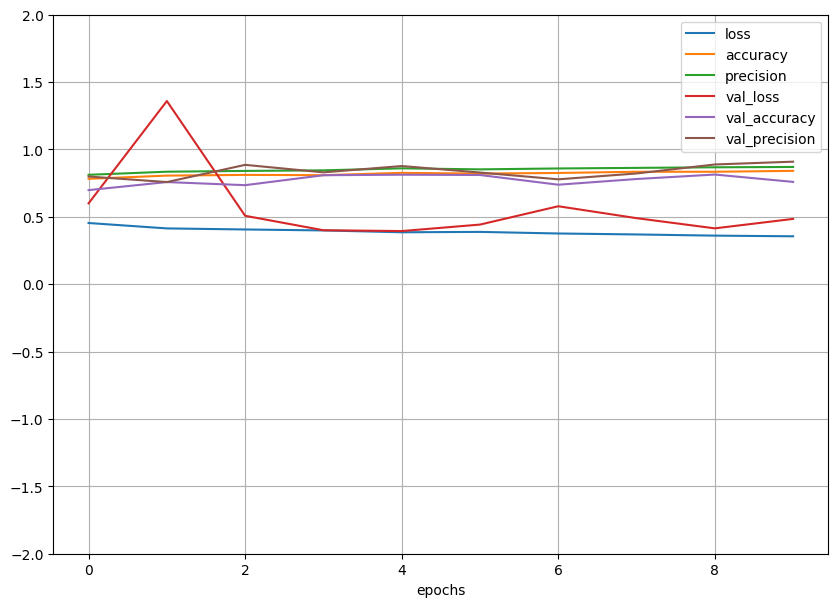

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(-2, 2)
plt.xlabel("epochs")
plt.show()

### • Check the accuracy, precision and loss

In [18]:
test_loss, test_acc, test_prec = model.evaluate(X_test_prep, y_test)
print('Test accuracy: ', test_acc)
print('Test Precision:', test_prec)
print('Test Loss:', test_loss)

74/74 [==============================] - 2s 26ms/step - loss: 0.5019 - accuracy: 0.7577 - precision: 0.9089
Test accuracy:  0.7576791644096375
Test Precision: 0.9088541865348816
Test Loss: 0.5018648505210876


## 8 - Prediction of new examples

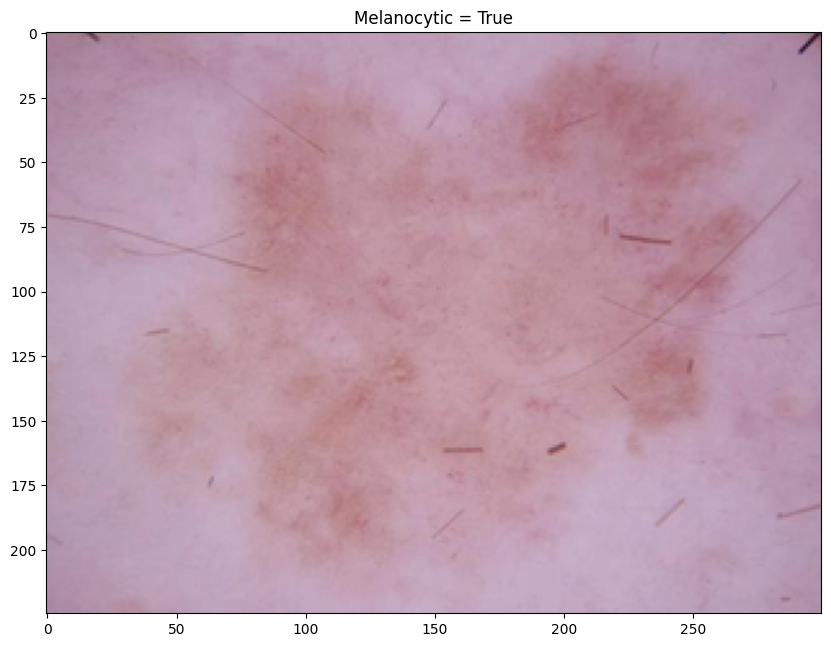

In [19]:
# Let's suppose X_new is a new image that has never been seen by our model
new_index = 0
X_new = X_test[new_index]

plt.figure(figsize=(10, 10))

plt.imshow(X_new)
if y_test[new_index] == 1:
  plt.title("Melanocytic = True")
else:
  plt.title("Melanocytic = False")

plt.show()



## • Every new image we need to normalize the data and transform the pixels

In [20]:
# Every new image we need to normalize the data and transform the pixels
d1, d2, d3 = X_new.shape

X_new_prep = X_new.reshape((1, d1*d2*d3))
X_new_prep = X_new_prep.astype('float32') / 255


### • Now we can predict the new image

In [21]:
# Do the prediction
y_pred = model.predict(X_new_prep)
print("Predicted: ", y_pred)
print("Actual value: ", y_test[new_index])


# Realizamos la prediccion obteniendo una clase en lugar de una probabilidad
print("Class predicted", np.round(y_pred)[0])

1/1 [==============================] - 0s 189ms/step
Predicted:  [[0.05491251]]
Actual value:  True
Class predicted [0.]


### • Now we check against the test set how many images predicted for each melanocytic value

In [22]:
predictions = model.predict(X_test_prep)
unique_originals, counts_originals = np.unique(y_test, return_counts=True)
print(f"Counts of originals test melanocytics = True: {counts_originals[1]}")
print(f"Counts of originals test melanocytics = False: {counts_originals[0]}")

unique_predictions, counts = np.unique(np.round(predictions), return_counts=True)
print(f"Unique predictions: {unique_predictions}")
print(f"Counts of predictions : {counts}")


74/74 [==============================] - 2s 25ms/step
Counts of originals test melanocytics = True: 1824
Counts of originals test melanocytics = False: 520
Unique predictions: [0. 1.]
Counts of predictions : [ 808 1536]


In [23]:
print("\nTest set category distribution:")
unique_originals, counts_originals = np.unique(y_train, return_counts=True)
print(f"Counts of originals test melanocytics = True: {counts_originals[1]}")
print(f"Counts of originals test melanocytics = False: {counts_originals[0]}")


Test set category distribution:
Counts of originals test melanocytics = True: 5441
Counts of originals test melanocytics = False: 1591


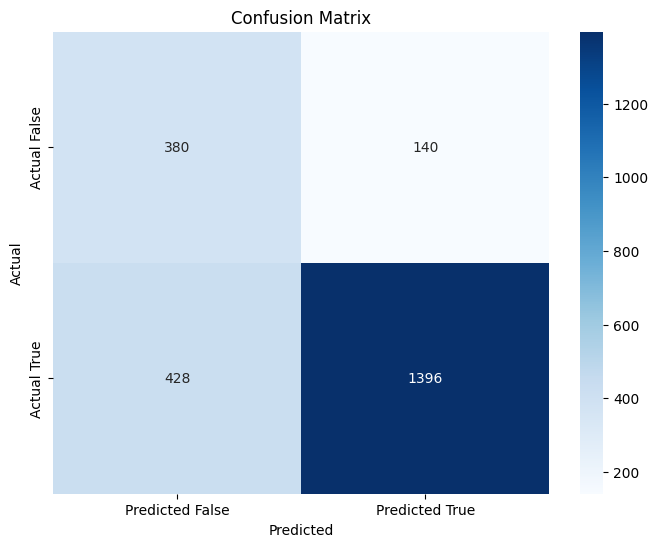

In [26]:
y_pred = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted False', 'Predicted True'], yticklabels=['Actual False', 'Actual True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()